In [ ]:
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time
import os

test_fit = os.path.join('..', 'data', 'glg_tte_n7_bn090926181_v00.fit')

tte = TTE.open(test_fit)
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

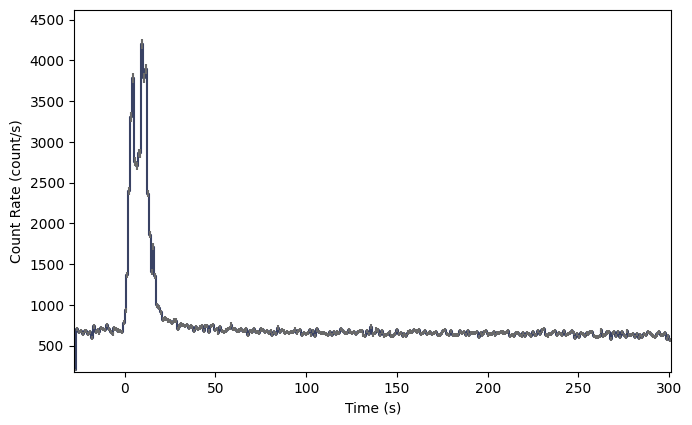

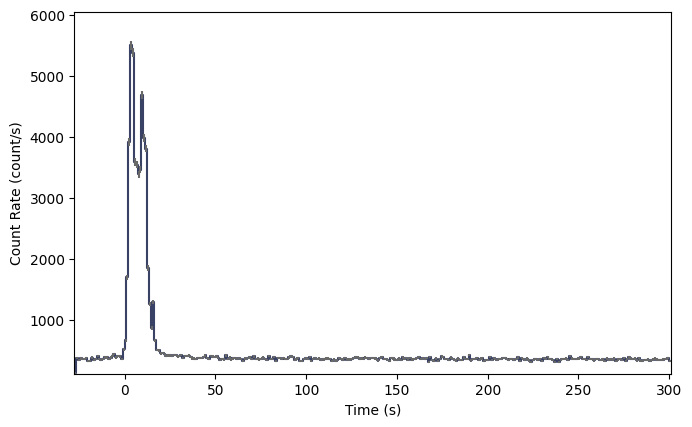

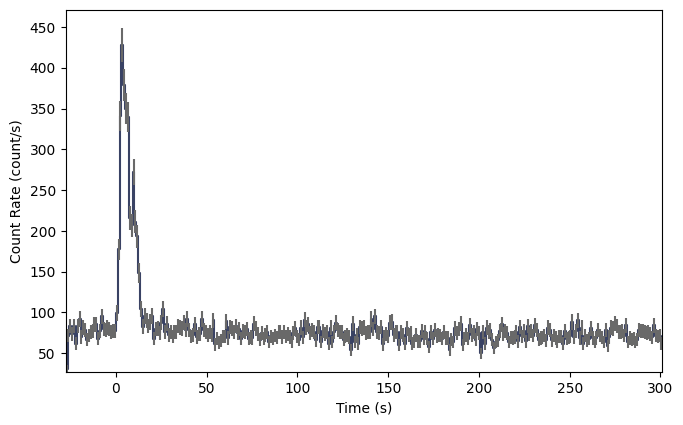

In [7]:
%matplotlib inline
from gbm.plot import Lightcurve

erange1 = (8.0, 50.0)
erange2 = (50.0, 300.0)
erange3 = (300.0, 900.0)

lc_data1 = phaii.to_lightcurve(energy_range=erange1)
lcplot1 = Lightcurve(data=lc_data1)

lc_data2 = phaii.to_lightcurve(energy_range=erange2)
lcplot2 = Lightcurve(data=lc_data2)

lc_data3 = phaii.to_lightcurve(energy_range=erange3)
lcplot3 = Lightcurve(data=lc_data3)

In [15]:
from gbm.data import Cspec, GbmDetectorCollection

test_pha = os.path.join('..', 'data', 'glg_cspec_n7_bn090926181_v00.pha')
n7 = Cspec.open(test_pha)

cspecs = GbmDetectorCollection.from_list([n7])

In [86]:
view_range = (-20.0, 40.0)
bkgd_range = [(-550., -300.), (675., 1000.)]
src_range = (10.0, 13.0)

In [87]:
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial

backfitters = [BackgroundFitter.from_phaii(cspec, Polynomial, time_ranges=bkgd_range) for cspec in cspecs]
backfitters = GbmDetectorCollection.from_list(backfitters, dets=cspecs.detector())

backfitters.fit(order=1)

bkgds = backfitters.interpolate_bins(cspecs.data()[0].tstart, cspecs.data()[0].tstop)
bkgds = GbmDetectorCollection.from_list(bkgds, dets=cspecs.detector())

In [88]:
# the lightcurves
data_lcs = cspecs.to_lightcurve(energy_range=erange1)
# the energy-integrated background
bkgd_lcs = bkgds.integrate_energy(*erange1)
# the source time selection
src_lcs = cspecs.to_lightcurve(time_range=src_range, energy_range=erange1)

# the count spectrum
data_specs = cspecs.to_spectrum(time_range=src_range)
# the time-integrated background
bkgd_specs = bkgds.integrate_time(*src_range)
# the energy selection
src_specs = cspecs.to_spectrum(time_range=src_range, energy_range=erange1)

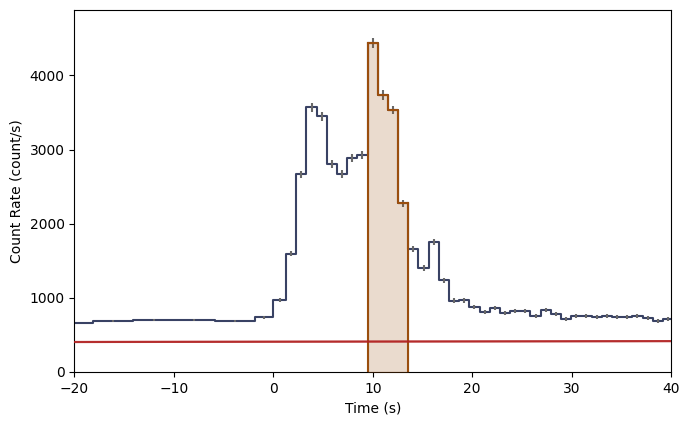

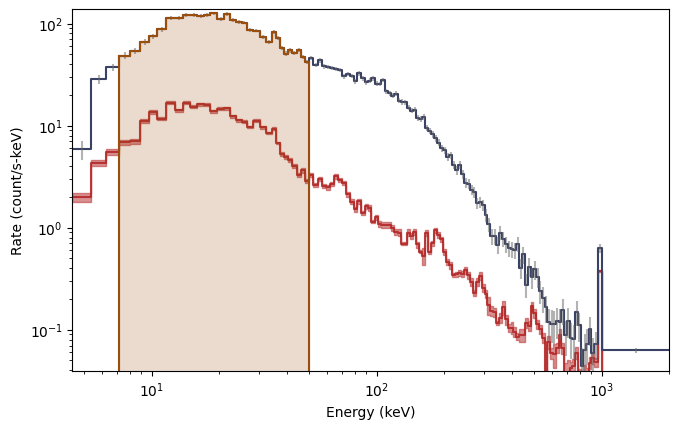

In [89]:
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

# Plot the lightcurves with the selections and background fit
lcplots = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs, bkgd_lcs)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots, src_lcs)]
# zoom in
for lcplot in lcplots:
    lcplot.xlim = view_range
 
# Plot the spectra with the selections and background fit
specplots = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots, src_specs)]